# Evaluation Exercises
---
Do you work for this exercise in a jupyter notebook named `evaluate` within your `regression-exercises` repository. By the end of this exercise you will also create a python script named `evaluate`, so the overall deliverables for this exercise are the python script and jupyter notebook both with the name `evaluate` within your `regression-exercises` repo.

### 1. Load the `tips` dataset from either `pydataset` or `seaborn`.

In [1]:
# import data function
from pydataset import data

# view documentation
data('tips', show_doc=True)

tips

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Tipping data

### Description

One waiter recorded information about each tip he received over a period of a
few months working in one restaurant. He collected several variables:

### Usage

    data(tips)

### Format

A data frame with 244 rows and 7 variables

### Details

  * tip in dollars, 

  * bill in dollars, 

  * sex of the bill payer, 

  * whether there were smokers in the party, 

  * day of the week, 

  * time of day, 

  * size of the party. 

In all he recorded 244 tips. The data was reported in a collection of case
studies for business statistics (Bryant & Smith 1995).

### References

Bryant, P. G. and Smith, M (1995) _Practical Data Analysis: Case Studies in
Business Statistics_. Homewood, IL: Richard D. Irwin Publishing:




In [2]:
# assign data to variable
tips = data('tips')
# view dataframe
tips.head()

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 1 to 244
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 15.2+ KB


### 2. Fit a linear regression model (ordinary least squares) and compute yhat, predictions of tip using total_bill.

In [4]:
from sklearn.linear_model import LinearRegression
# create object
model = LinearRegression()
# fit object (predictor, target)
model.fit(tips[['total_bill']], tips['tip'])
# make predictions using the predictor
tips['yhat'] = model.predict(tips[['total_bill']])
tips.head()

,total_bill,tip,sex,smoker,day,time,size,yhat
1,16.99,1.01,Female,No,Sun,Dinner,2,2.704636
2,10.34,1.66,Male,No,Sun,Dinner,3,2.006223
3,21.01,3.50,Male,No,Sun,Dinner,3,3.126835
4,23.68,3.31,Male,No,Sun,Dinner,2,3.407250
5,24.59,3.61,Female,No,Sun,Dinner,4,3.502822


### 3. Plot the residuals for the linear regression model that you made.

In [5]:
# create column of residual values
tips['residual'] = tips.tip - tips.yhat
tips.head()

,total_bill,tip,sex,smoker,day,time,size,yhat,residual
1,16.99,1.01,Female,No,Sun,Dinner,2,2.704636,-1.694636
2,10.34,1.66,Male,No,Sun,Dinner,3,2.006223,-0.346223
3,21.01,3.50,Male,No,Sun,Dinner,3,3.126835,0.373165
4,23.68,3.31,Male,No,Sun,Dinner,2,3.407250,-0.097250
5,24.59,3.61,Female,No,Sun,Dinner,4,3.502822,0.107178


Text(0.5, 1.0, 'Model Residuals')

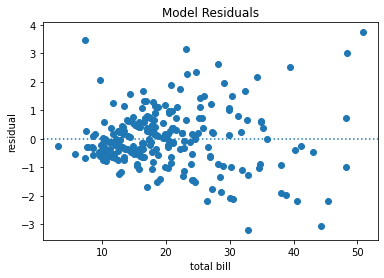

In [6]:
from matplotlib import pyplot as plt
# plot residuals
plt.scatter(tips.total_bill, tips.residual)
plt.axhline(y=0, ls=':')
plt.ylabel('residual')
plt.xlabel('total bill')
plt.title('Model Residuals')

### 4. Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.

In [7]:
# drop columns I don't need for these exercises
tips = tips.drop(columns=tips.select_dtypes(['O', 'int']))

In [8]:
tips.head()

,total_bill,tip,yhat,residual
1,16.99,1.01,2.704636,-1.694636
2,10.34,1.66,2.006223,-0.346223
3,21.01,3.50,3.126835,0.373165
4,23.68,3.31,3.407250,-0.097250
5,24.59,3.61,3.502822,0.107178


In [9]:
# create column of squared residuals
tips['residual^2'] = tips.residual**2
tips.head()

,total_bill,tip,yhat,residual,residual^2
1,16.99,1.01,2.704636,-1.694636,2.871792
2,10.34,1.66,2.006223,-0.346223,0.119870
3,21.01,3.50,3.126835,0.373165,0.139252
4,23.68,3.31,3.407250,-0.097250,0.009458
5,24.59,3.61,3.502822,0.107178,0.011487


In [10]:
import math

# calculate SSE, ESS, TSS, MSE, and RMSE manually
SSE = tips['residual^2'].sum()
ESS = sum((tips.yhat - tips.tip.mean())**2)
TSS = ESS + SSE
MSE = SSE/len(tips)
RMSE = math.sqrt(MSE)
# print results
print(f'Sum of Squared Errors = {SSE}')
print(f'Explained Sum of Squares = {ESS}')
print(f'Total Sum of Squares = {TSS}')
print(f'Mean Squared Error = {MSE}')
print(f'Root Mean Squared Error = {RMSE}')

Sum of Squared Errors = 252.788743850776
Explained Sum of Squares = 212.42373319840416
Total Sum of Squares = 465.21247704918017
Mean Squared Error = 1.036019442011377
Root Mean Squared Error = 1.0178504025697377


### 5. Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average tip amount).

In [11]:
# create baseline using mean tip amount
tips['baseline'] = tips.tip.mean()
tips.head()

,total_bill,tip,yhat,residual,residual^2,baseline
1,16.99,1.01,2.704636,-1.694636,2.871792,2.998279
2,10.34,1.66,2.006223,-0.346223,0.119870,2.998279
3,21.01,3.50,3.126835,0.373165,0.139252,2.998279
4,23.68,3.31,3.407250,-0.097250,0.009458,2.998279
5,24.59,3.61,3.502822,0.107178,0.011487,2.998279


In [12]:
# calculate values using sklearn
from sklearn.metrics import mean_squared_error

bMSE = mean_squared_error(tips.tip, tips.baseline)
bSSE = bMSE * len(tips)
bRMSE = math.sqrt(bMSE)
# print results
print(f'Sum of Squared Errors = {bSSE}')
print(f'Mean Squared Error = {bMSE}')
print(f'Root Mean Squared Error = {bRMSE}')

Sum of Squared Errors = 465.2124770491804
Mean Squared Error = 1.906608512496641
Root Mean Squared Error = 1.3807999538298954


### 6. Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.

In [13]:
if bSSE < SSE:
    print('My model does not perform better than the baseline model.')
else:
    print('My model performs better than the baseline model.')

My model performs better than the baseline model.


### 7. What is the amount of variance explained in your model?

In [14]:
print(f'The amount of variance explained in my model is {ESS}.')

The amount of variance explained in my model is 212.42373319840416.


### 8. Is your model better than the baseline model?

Yes, my model is better than the baseline model.

### 9. Create a file named `evaluate.py` that contains the following functions.
- `plot_residuals(y, yhat)`: creates a residual plot
- `regression_errors(y, yhat)`: returns the following values:
    - sum of squared errors (SSE)
    - explained sum of squares (ESS)
    - total sum of squares (TSS)
    - mean squared error (MSE)
    - root mean squared error (RMSE)
- `baseline_mean_errors(y)`: computes the SSE, MSE, and RMSE for the baseline model
- `better_than_baseline(y, yhat)`: returns true if your model performs better than the baseline, otherwise false

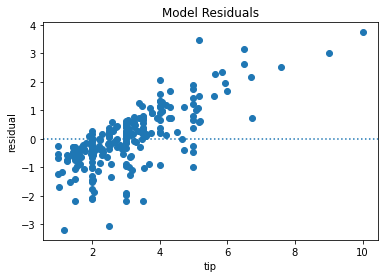

In [15]:
# plot_residuals(y, yhat): creates a residual plot
def plot_residuals(df, y, yhat):
    '''
    This function takes in a dataframe and the names of a target column and a predictions
    column. It returns a scatterplot of the model's residuals against the target.
    '''
    df['residual'] = df[y] - df[yhat]
    plt.scatter(df[y], df.residual)
    plt.axhline(y=0, ls=':')
    plt.ylabel('residual')
    plt.xlabel(f'{y}')
    plt.title('Model Residuals')
    return plt.show();

# test function
plot_residuals(tips, 'tip', 'yhat')

In [16]:
# regression_errors(y, yhat): returns the following values:
# sum of squared errors (SSE)
# explained sum of squares (ESS)
# total sum of squares (TSS)
# mean squared error (MSE)
# root mean squared error (RMSE)
def regression_errors(df, y, yhat):
    '''
    This function takes in a dataframe and the names of a target column and a predictions
    column. It returns the model's SSE, ESS, TSS, MSE, and RMSE, in that order.
    '''
    df['residual^2'] = df.residual**2
    SSE = df['residual^2'].sum()
    ESS = sum((df[yhat] - df[y].mean())**2)
    TSS = ESS + SSE
    MSE = SSE/len(df)
    RMSE = math.sqrt(MSE)
    return SSE, ESS, TSS, MSE, RMSE

# test function
regression_errors(tips, 'tip', 'yhat')

(252.788743850776,
 212.42373319840416,
 465.21247704918017,
 1.036019442011377,
 1.0178504025697377)

In [17]:
# baseline_mean_errors(y): computes the SSE, MSE, and RMSE for the baseline model
def baseline_mean_errors(df, y):
    '''
    This function takes in a dataframe and the name of a target column. It returns the
    SSE, MSE, and RMSE for the baseline, in that order.
    '''
    df['baseline'] = df[y].mean()
    bMSE = mean_squared_error(df[y], df.baseline)
    bSSE = bMSE * len(df)
    bRMSE = math.sqrt(bMSE)
    return bSSE, bMSE, bRMSE

# test function
baseline_mean_errors(tips, 'tip')

(465.2124770491804, 1.906608512496641, 1.3807999538298954)

In [18]:
# create function
def better_than_baseline(df, y, yhat):
    '''
    This function takes in a dataframe and the names of a target column and a predictions
    column. It returns whether or not the created model is better than the baseline.
    '''
    SSE, ESS, TSS, MSE, RMSE = regression_errors(df, y, yhat)
    bSSE, bMSE, bRMSE = baseline_mean_errors(df, y)
    if bSSE < SSE:
        return False
    else:
        return True

# test function
better_than_baseline(tips, 'tip', 'yhat')

True

### 10. Load the `mpg` dataset and fit a model that predicts highway mileage based on engine displacement. Take a look at all the regression evaluation metrics, and determine whether this model is better than the baseline model. Use the functions from your `evaluate.py` to help accomplish this.

In [19]:
# view documentation
data('mpg', show_doc=True)

mpg

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Fuel economy data from 1999 and 2008 for 38 popular models of car

### Description

This dataset contains a subset of the fuel economy data that the EPA makes
available on http://fueleconomy.gov. It contains only models which had a new
release every year between 1999 and 2008 - this was used as a proxy for the
popularity of the car.

### Usage

    data(mpg)

### Format

A data frame with 234 rows and 11 variables

### Details

  * manufacturer. 

  * model. 

  * displ. engine displacement, in litres 

  * year. 

  * cyl. number of cylinders 

  * trans. type of transmission 

  * drv. f = front-wheel drive, r = rear wheel drive, 4 = 4wd 

  * cty. city miles per gallon 

  * hwy. highway miles per gallon 

  * fl. 

  * class. 




In [20]:
# assign dataframe to variable
mpg = data('mpg')
# preview
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [21]:
# create object
mpg_model = LinearRegression()
# fit object (predictor, target)
mpg_model.fit(mpg[['displ']], mpg['hwy'])
# predict mpg.hwy based on mpg.displ
mpg['yhat'] = mpg_model.predict(mpg[['displ']])
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,yhat
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,29.342591
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,29.342591
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,28.636473
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,28.636473
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,25.812002


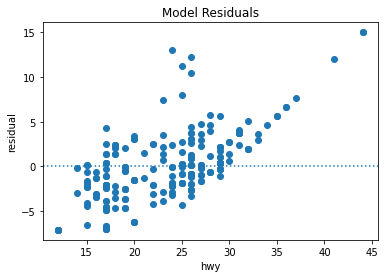

In [22]:
import evaluate
# plot residuals
evaluate.plot_residuals(mpg, 'hwy', 'yhat')

In [23]:
# view regression evaluation metrics
evaluate.regression_errors(mpg, 'hwy', 'yhat')

(3413.829008995467,
 4847.833384166925,
 8261.66239316239,
 14.589012858954987,
 3.8195566312014524)

In [24]:
evaluate.baseline_mean_errors(mpg, 'hwy')

(8261.66239316239, 35.30624954342902, 5.941906221359356)

In [25]:
# determine if model is better than baseline
evaluate.better_than_baseline(mpg, 'hwy', 'yhat')

True